## Advanced Box Score Calculations
Author: Akshay Easwaran <akeaswaran@me.com>

---
Based on work by ESPN's Bill Connelly, Football Outsiders, and Football Study Hall

Data from CollegeFootballData.com

Useful Resources for Stat Definitions:
- Football Study Hall website: https://www.footballstudyhall.com/
- Football Study Hall book: https://www.amazon.com/Study-Hall-College-Football-Stories/dp/1484989961
- Football Outsiders: https://www.footballoutsiders.com/info/glossary
- Example Advanced Box Score: https://twitter.com/ESPN_BillC/status/1176572006969597954/photo/1

**How to use this Notebook**

1. Dump a game's play by play data and drive data from CollegeFootballData.com.
2. Change the file names in the next cell to match where your data files are located.
3. Change the away and home team names appropriately.
4. Hit Cell > Run All Cells.

In [11]:
import pandas as pd

base_drives = pd.read_json('data/drives/drive-data-national.json')
base_drives.drop(['offense_conference','start_time','end_time','defense_conference','elapsed','start_period','end_period'], axis = 1, inplace=True) 
base_drives = base_drives[
    ~base_drives.drive_result.isin(['END OF HALF','END OF GAME','Uncategorized'])
]

games = pd.read_json('data/games/game-data-national.json')

selected_team = 'National'

In [12]:
# Data Cleaning
# Fix the bad yard line markers for away teams
drives = pd.merge(base_drives, games[['id','away_team','home_team']], left_on='game_id', right_on='id', how='right')
drives.rename(columns={'id_x':'drive_id'}, inplace=True)
drives.drop(['id_y'], axis = 1, inplace=True)
drives.dropna(inplace=True)
drives.loc[
    drives.offense == drives.away_team, ['start_yardline']
] = 100 - drives.start_yardline
drives.loc[
    drives.offense == drives.away_team, ['end_yardline']
] = 100 - drives.end_yardline

print("Total Drives:", len(drives))
# drives

Total Drives: 9299


In [16]:
print(selected_team, "Drives:", len(drives))

print(selected_team, "Avg Starting Field Position:", sum(drives.start_yardline) / len(drives))
print(selected_team, "Mdn Starting Field Position:", drives.start_yardline.median())
print("")

drives['yards_per_play'] = drives.apply(lambda x: (x.yards / x.plays) if (x.plays > 0) else 0, axis=1)
print(selected_team, "Avg Yards per Play:", drives.yards_per_play.mean())
print(selected_team, "Mdn Yards per Play:", drives.yards_per_play.median())

print("")
print(selected_team, "Avg Plays per Drive:", drives.plays.mean())
print(selected_team, "Mdn Plays per Drive:", drives.plays.median())

print("")
print(selected_team, "Avg Yards per Drive:", drives.yards.mean())
print(selected_team, "Mdn Yards per Drive:", drives.yards.median())

National Drives: 9299
National Avg Starting Field Position: 30.241208732121734
National Mdn Starting Field Position: 25.0

National Avg Yards per Play: 5.827556991419048
National Mdn Yards per Play: 4.2

National Avg Plays per Drive: 5.6672760511883
National Mdn Plays per Drive: 5.0

National Avg Yards per Drive: 32.14205828583719
National Mdn Yards per Drive: 25.0


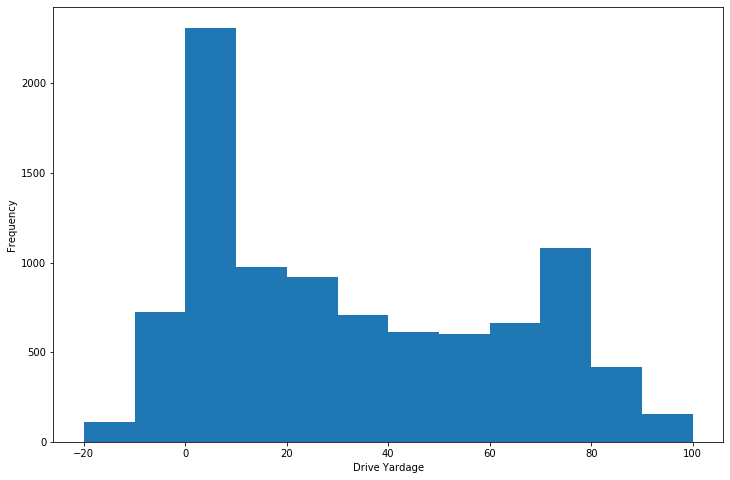

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(12,8))
ax.hist(drives.yards, bins=[-20,-10,0,10,20,30,40,50,60,70,80,90,100]);
ax.set_ylabel("Frequency");
ax.set_xlabel("Drive Yardage");

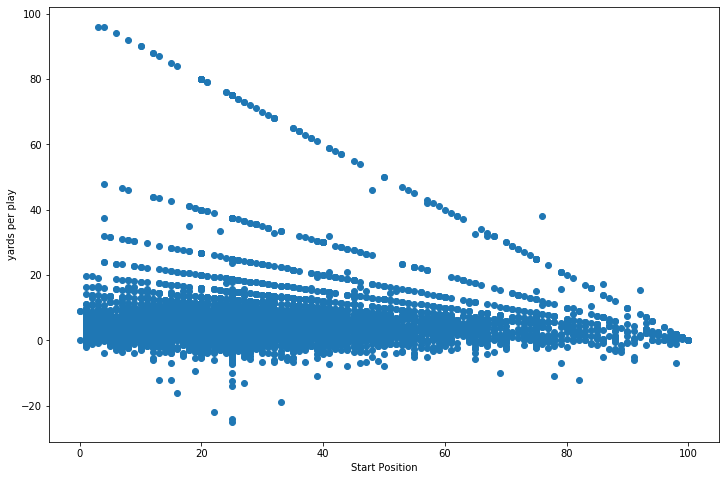

In [30]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
ax.scatter(drives.start_yardline, drives.yards_per_play);
ax.set_ylabel("yards per play");
ax.set_xlabel("Start Position");